In [317]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
from matplotlib.lines import Line2D
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [318]:
with open("simu3_data/simu3_design.pkl", 'rb') as inp:
    df = pickle.load(inp)
df = df.loc[df.session < 300]
df

,position,session,testidx,lag,type,study_itemno1,study_itemno2,test_itemno1,test_itemno2
0,1,0,40,0,-1,708,1244,589,984
1,2,0,91,0,-1,751,680,603,433
2,3,0,131,0,-1,823,1591,709,-1
3,4,0,2,2,0,880,1325,384,-1
4,5,0,87,0,-1,51,1505,11,735
...,...,...,...,...,...,...,...,...,...
47995,156,299,152,4,3,677,1211,890,1117
47996,157,299,153,4,3,1462,1416,890,1579
47997,158,299,156,2,2,1412,24,677,1211
47998,159,299,151,8,1,925,390,12,-1


### Run CMR-IA

In [319]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [320]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.4,  # 0.1  /0.4
    beta_cue = 0.4,  # 0.4  /0.7
    beta_rec_post = 0.4,  # 0.1
    gamma_fc = 0.1,  # 0.1
    s_fc = 0.1,  # 0.1
    c_thresh_itm = 0.22,  # 0.22
    c_thresh_ass = 0.12,  # 0.285
    d_ass = 0,
    use_new_context = True,
)
params

{'beta_enc': 0.4,
 'beta_rec': 0.5,
 'beta_cue': 0.4,
 'beta_rec_post': 0.4,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.1,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.22,
 'c_thresh_ass': 0.12,
 'd_ass': 0,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.1,
 'gamma_cf': 0.5,
 'use_new_context': True}

In [321]:
# pos_b = np.arange(0,1,0.05)
# csim_old = []
# csim_new = []
# for b in pos_b:
#     # print(b)
#     params.update(beta_enc = b)
#     df_simu = cmr.run_hockley_recog_multi_sess(params,df,s_mat)
#     df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
#     old = df_simu.loc[df_simu.type == 1].csim.mean()
#     new = df_simu.loc[df_simu.type == 0].csim.mean()
#     csim_old.append(old)
#     csim_new.append(new)
# df_tmp = pd.DataFrame(data = {'b':pos_b, 'old':csim_old, 'new':csim_new})
# sns.lineplot(data=df_tmp, x='b', y='old', linewidth=2)
# sns.lineplot(data=df_tmp, x='b', y='new', linewidth=2)

In [322]:
df_simu = cmr.run_conti_recog_multi_sess(params, df, s_mat, mode="Hockley")
df_simu

100%|██████████| 300/300 [00:47<00:00,  6.29it/s]

CMR Time: 47.71744418144226


,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim
0,0,1,708,1244,589,984,0.0,64.791405,0.031690
1,0,2,751,680,603,433,1.0,391.746063,0.121662
2,0,3,823,1591,709,-1,0.0,132.088959,0.067305
3,0,4,880,1325,384,-1,0.0,760.913940,0.154857
4,0,5,51,1505,11,735,1.0,673.548645,0.148759
...,...,...,...,...,...,...,...,...,...
47995,299,156,677,1211,890,1117,1.0,2494.974365,0.214233
47996,299,157,1462,1416,890,1579,1.0,1180.700439,0.263176
47997,299,158,1412,24,677,1211,1.0,311.876038,0.329738
47998,299,159,925,390,12,-1,0.0,2367.563232,0.211612


In [323]:
df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,testidx,lag,type
0,0,1,708,1244,589,984,0.0,64.791405,0.031690,40,0,-1
1,0,2,751,680,603,433,1.0,391.746063,0.121662,91,0,-1
2,0,3,823,1591,709,-1,0.0,132.088959,0.067305,131,0,-1
3,0,4,880,1325,384,-1,0.0,760.913940,0.154857,2,2,0
4,0,5,51,1505,11,735,1.0,673.548645,0.148759,87,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
47995,299,156,677,1211,890,1117,1.0,2494.974365,0.214233,152,4,3
47996,299,157,1462,1416,890,1579,1.0,1180.700439,0.263176,153,4,3
47997,299,158,1412,24,677,1211,1.0,311.876038,0.329738,156,2,2
47998,299,159,925,390,12,-1,0.0,2367.563232,0.211612,151,8,1


In [324]:
df_simu.groupby(['type','lag']).csim.mean()

type  lag
-1    0      0.146650
 0    2      0.151600
      4      0.153842
      6      0.153666
      8      0.153499
      16     0.152796
 1    2      0.288356
      4      0.229264
      6      0.211382
      8      0.206298
      16     0.188970
 2    2      0.290073
      4      0.251315
      6      0.234220
      8      0.229569
      16     0.216241
 3    2      0.274850
      4      0.241732
      6      0.229586
      8      0.230826
      16     0.215493
Name: csim, dtype: float64

### PLOT

In [325]:
df_laggp = df_simu.groupby(['type','lag']).s_resp.mean().to_frame(name='yes_rate').reset_index()
df_laggp['no_rate'] = 1 - df_laggp['yes_rate'] 
df_laggp

,type,lag,yes_rate,no_rate
0,-1,0,0.379144,0.620856
1,0,2,0.057026,0.942974
2,0,4,0.069061,0.930939
3,0,6,0.070409,0.929591
4,0,8,0.057207,0.942793
5,0,16,0.066245,0.933755
6,1,2,0.938560,0.061440
7,1,4,0.563703,0.436297
8,1,6,0.391948,0.608052
9,1,8,0.369514,0.630486


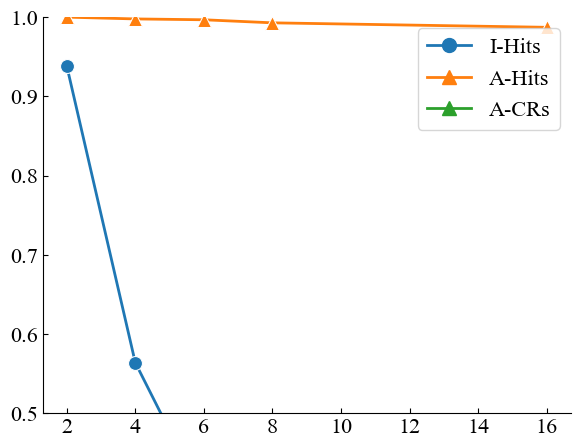

In [326]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp.loc[df_laggp.type == 1], x='lag', y='yes_rate', linewidth=2, marker='o', markersize = 10, label='I-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 2], x='lag', y='yes_rate', linewidth=2, marker='^', markersize = 10, label='A-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 3], x='lag', y='no_rate', linewidth=2, marker='^', markersize = 10, label='A-CRs')
plt.ylim([0.5,1])
plt.xlabel('Test Lag')
plt.ylabel('Proportion Correct')
ax.set(xlabel=None, ylabel=None)
plt.xticks(ticks=np.arange(2,18,2))
# plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'I-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='-', label = 'A-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[2], lw=2, marker='^', markersize = 10, linestyle='-', label = 'A-CRs')]
plt.legend(handles = legend_elements)

# plt.savefig('simu3_fig/simu3_hr.pdf')
plt.show()

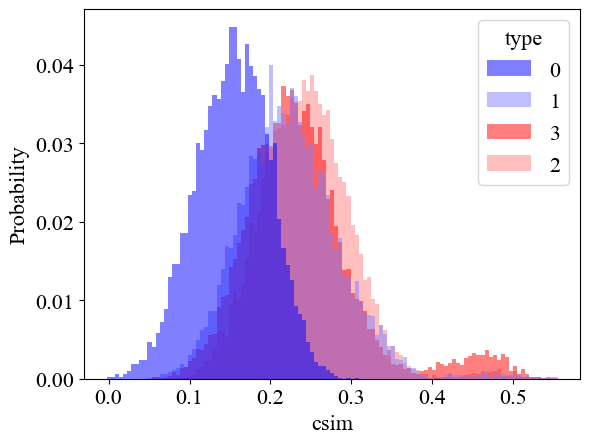

In [327]:
sns.histplot(data=df_simu, x="csim", hue = "type", hue_order = [0,1,3,2], palette = [[0,0,1],[0.5,0.5,1],[1,0,0],[1,0.5,0.5]], stat = "probability", binwidth = 0.005, common_norm=False, edgecolor = None)
# plt.savefig('fig/simu3_csim.pdf')
plt.show()

In [328]:
df_dprime = pd.DataFrame()
df_dprime['lag'] = [2,4,6,8,16]
df_dprime['I_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 1, 'yes_rate'].astype(float))
df_dprime['I_z_far'] = np.mean(sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 0, 'yes_rate'].astype(float)))
df_dprime['I_dprime'] = df_dprime['I_z_hr'] - df_dprime['I_z_far']
df_dprime['A_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 2, 'yes_rate'].astype(float))
df_dprime['A_z_far'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 3, 'yes_rate'].astype(float))
df_dprime['A_dprime'] = df_dprime['A_z_hr'] - df_dprime['A_z_far']
df_dprime

,lag,I_z_hr,I_z_far,I_dprime,A_z_hr,A_z_far,A_dprime
0,2,1.542800,-1.523767,3.066566,inf,3.324140,inf
1,4,0.160365,-1.523767,1.684131,2.838755,2.318932,0.519823
2,6,-0.274245,-1.523767,1.249522,2.714154,2.021209,0.692946
3,8,-0.333141,-1.523767,1.190626,2.447739,2.067449,0.380290
4,16,-0.637659,-1.523767,0.886108,2.230840,1.705171,0.525669


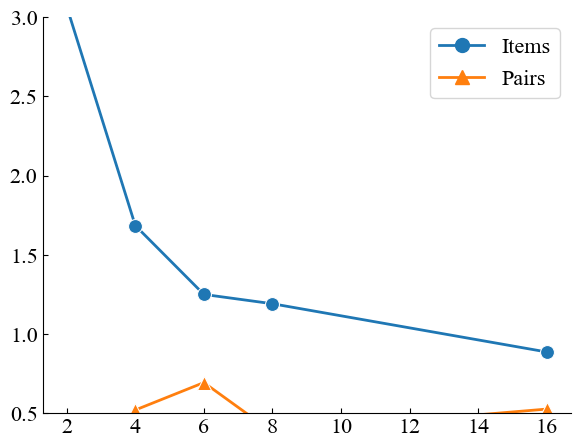

In [329]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, x='lag', y='I_dprime', linewidth=2, marker='o', markersize = 10, label='Items')
sns.lineplot(data=df_dprime, x='lag', y='A_dprime', linewidth=2, marker='^', markersize = 10, label='Pairs')
# plt.ylabel("$d^'$")
# plt.xlabel('Test Lag')
ax.set(xlabel=None, ylabel=None)
plt.ylim([0.5,3])
plt.xticks(ticks=np.arange(2,18,2))
# plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'Items'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='-', label = 'Pairs')]
plt.legend(handles = legend_elements)

# plt.savefig('simu3_fig/simu3_dprime.pdf')
plt.show()